<a href="https://colab.research.google.com/github/tomeliud/test_project/blob/master/Moringa_School_Core_Week_8_IP_Decision_Trees_and_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothyroidism Prediction in Patients

# 1. Defining the Question

a) Specifying the Question

Our dataset is an alysis from Nairobi Hospital where they conducted a clinical camp to test for hypothyroidism. Therefore, our task is to create a model that wil determine whether or not a patient's symptoms indicate presence of hypothyroid.

b) Defining the Metric for Success

Determining factors that will result to a positive test for hypothyroid

Build a model that is capable of determine whether a patient has Hypothroid or not with a accuracy of almost 100%

c) The Experimental Design

1. Data Cleaning and Preparation
2. Perform EDA
3. Modelling
4. Evaluation of the Models

# 2. Reading the Data

Importing our libraries 

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas.util.testing as tm
from sklearn import linear_model, datasets
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from sklearn import metrics
%matplotlib inline 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
patient = pd.read_csv('hypothyroid.csv')


## 3. Checking the Data

In [6]:
patient.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,f,f,f,y,30,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,f,f,f,y,145,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,f,f,f,y,0,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,f,f,f,y,430,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,f,f,f,y,7.30,y,1.20,y,57,y,1.28,y,44,n,?


In [7]:
patient.tail(3)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3160,negative,77,M,f,f,f,f,f,f,f,f,f,f,f,y,1.20,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,f,f,f,f,y,1.30,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,f,f,f,f,y,0,y,1.80,y,139,y,0.97,y,143,n,?


In [8]:
#size 
print(f'The dataset has {patient.shape[0]} rows and {patient.shape[1]} columns')

The dataset has 3163 rows and 26 columns


In [9]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

## 4. Tidying the Dataset

In [10]:
#null values 
patient.isnull().any()

status                       False
age                          False
sex                          False
on_thyroxine                 False
query_on_thyroxine           False
on_antithyroid_medication    False
thyroid_surgery              False
query_hypothyroid            False
query_hyperthyroid           False
pregnant                     False
sick                         False
tumor                        False
lithium                      False
goitre                       False
TSH_measured                 False
TSH                          False
T3_measured                  False
T3                           False
TT4_measured                 False
TT4                          False
T4U_measured                 False
T4U                          False
FTI_measured                 False
FTI                          False
TBG_measured                 False
TBG                          False
dtype: bool

In [11]:
#checking for duplicates 
patient.duplicated().any()

True

In [0]:
#droping duplicates
patient.drop_duplicates(inplace= True)

In [13]:
#confirming our duplicates have been dropped 
patient.duplicated().any()

False

In [0]:
#label encoding 
encode = LabelEncoder()
patient['sex'] = encode.fit_transform(patient['sex'])
patient['on_thyroxine'] = encode.fit_transform(patient['on_thyroxine'])
patient['query_on_thyroxine'] = encode.fit_transform(patient['query_on_thyroxine'])
patient['on_antithyroid_medication'] = encode.fit_transform(patient['on_antithyroid_medication'])
patient['thyroid_surgery'] = encode.fit_transform(patient['thyroid_surgery'])
patient['query_hypothyroid'] = encode.fit_transform(patient['query_hypothyroid'])
patient['query_hyperthyroid'] = encode.fit_transform(patient['query_hyperthyroid'])
patient['pregnant'] = encode.fit_transform(patient['pregnant'])
patient['sick'] = encode.fit_transform(patient['sick'])
patient['tumor'] = encode.fit_transform(patient['tumor'])
patient['lithium'] = encode.fit_transform(patient['lithium'])
patient['goitre'] = encode.fit_transform(patient['goitre'])
patient['TSH_measured'] = encode.fit_transform(patient['TSH_measured'])
patient['T3_measured'] = encode.fit_transform(patient['T3_measured'])
patient['TT4_measured'] = encode.fit_transform(patient['TT4_measured'])
patient['T4U_measured'] = encode.fit_transform(patient['T4U_measured'])
patient['FTI_measured'] = encode.fit_transform(patient['FTI_measured'])
patient['TBG_measured'] = encode.fit_transform(patient['TBG_measured'])

In [0]:
patient.replace({"?": 0}, inplace=True)

In [0]:
#Convert columns to relevant datatypes 
patient[['TSH','T3','TT4','T4U','FTI', 'TBG']] = patient[['TSH','T3','TT4','T4U','FTI', 'TBG']].astype(float)

In [0]:
patient['age'] = patient['age'].astype(int)

In [18]:
#confirming our datatypes 
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3086 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     3086 non-null   object 
 1   age                        3086 non-null   int64  
 2   sex                        3086 non-null   int64  
 3   on_thyroxine               3086 non-null   int64  
 4   query_on_thyroxine         3086 non-null   int64  
 5   on_antithyroid_medication  3086 non-null   int64  
 6   thyroid_surgery            3086 non-null   int64  
 7   query_hypothyroid          3086 non-null   int64  
 8   query_hyperthyroid         3086 non-null   int64  
 9   pregnant                   3086 non-null   int64  
 10  sick                       3086 non-null   int64  
 11  tumor                      3086 non-null   int64  
 12  lithium                    3086 non-null   int64  
 13  goitre                     3086 non-null   int64

Checking for outliers 

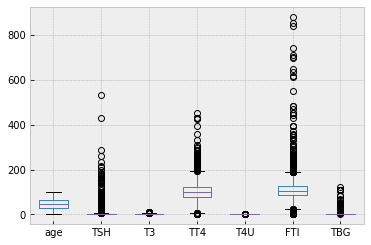

In [19]:
plt.style.use('bmh')
num = patient[['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'TBG']]
_t, df_outliers = pd.DataFrame.boxplot(num, return_type="both", widths=0.6)
outliers = [flier.get_ydata() for flier in df_outliers["fliers"]]
out_liers = [i.tolist() for i in outliers]
boxes = [box.get_ydata() for box in df_outliers["boxes"]]
whiskers = [whiskers.get_ydata() for whiskers in df_outliers["whiskers"]]

In [0]:
#droping outliers 
q3 = patient.quantile(0.75)
q1 = patient.quantile(0.25)
iqr = q3-q1
patient = patient[~((patient < (q1 - 1.5 * iqr)) |(patient > (q3 + 1.5 * iqr))).any(axis=1)]

In [21]:
#confirming outliers have being removed 
print(patient.shape)

(1227, 26)


In [22]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1227 entries, 151 to 3161
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   status                     1227 non-null   object 
 1   age                        1227 non-null   int64  
 2   sex                        1227 non-null   int64  
 3   on_thyroxine               1227 non-null   int64  
 4   query_on_thyroxine         1227 non-null   int64  
 5   on_antithyroid_medication  1227 non-null   int64  
 6   thyroid_surgery            1227 non-null   int64  
 7   query_hypothyroid          1227 non-null   int64  
 8   query_hyperthyroid         1227 non-null   int64  
 9   pregnant                   1227 non-null   int64  
 10  sick                       1227 non-null   int64  
 11  tumor                      1227 non-null   int64  
 12  lithium                    1227 non-null   int64  
 13  goitre                     1227 non-null   int

## 5. Exploratory Data Analysis

### Univariate analysis 

In [23]:
patient.head(5)

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
151,negative,20,1,0,0,0,0,0,0,0,0,0,0,0,1,0.5,1,1.8,1,68.0,1,0.99,1,68.0,0,0.0
153,negative,29,1,0,0,0,0,0,0,0,0,0,0,0,1,1.2,1,2.5,1,83.0,1,0.93,1,89.0,0,0.0
154,negative,45,1,0,0,0,0,0,0,0,0,0,0,0,1,1.9,1,1.0,1,82.0,1,0.73,1,112.0,0,0.0
156,negative,56,2,0,0,0,0,0,0,0,0,0,0,0,1,0.0,1,0.8,1,76.0,1,0.77,1,99.0,0,0.0
158,negative,62,2,0,0,0,0,0,0,0,0,0,0,0,1,0.4,1,2.2,1,103.0,1,0.99,1,104.0,0,0.0


In [24]:
#stastical representation of our data 
stat = patient.describe()
stat.loc['Range'] = stat.loc['max'] - stat.loc['min']
stat.loc['IQR'] = stat.loc['75%'] - stat.loc['25%'] 
stat

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,sick,tumor,lithium,goitre,TSH_measured,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
count,1227.000000,1227.000000,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.0,1227.000000,1227.0,1227.000000,1227.0,1227.000000,1227.0,1227.000000,1227.0,1227.000000,1227.0,1227.0
mean,44.407498,1.391198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.845232,1.0,1.798492,1.0,101.488183,1.0,0.926373,1.0,110.339038,0.0,0.0
std,27.797512,0.526790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.957676,0.0,0.607760,0.0,24.840217,0.0,0.150382,0.0,23.618173,0.0,0.0
min,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,0.050000,1.0,31.000000,1.0,0.480000,1.0,33.000000,0.0,0.0
25%,24.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,1.0,1.400000,1.0,85.000000,1.0,0.830000,1.0,96.000000,0.0,0.0
50%,50.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.600000,1.0,1.800000,1.0,100.000000,1.0,0.930000,1.0,108.000000,0.0,0.0
75%,68.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.300000,1.0,2.200000,1.0,116.000000,1.0,1.020000,1.0,123.000000,0.0,0.0
max,97.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.200000,1.0,4.300000,1.0,184.000000,1.0,1.380000,1.0,187.000000,0.0,0.0
Range,97.000000,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.200000,0.0,4.250000,0.0,153.000000,0.0,0.900000,0.0,154.000000,0.0,0.0
IQR,44.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.300000,0.0,0.800000,0.0,31.000000,0.0,0.190000,0.0,27.000000,0.0,0.0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

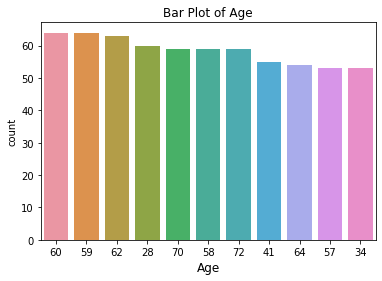

In [3]:
#let us have a look at the most common age in ourdataset 
sns.countplot(patient['age'], order= patient['age'].value_counts().iloc[1:12].index)
plt.title('Bar Plot of Age')
plt.xlabel('Age', fontsize=12)
plt.xticks(rotation = 0)

Most of our patients were between 70 to 60 years 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

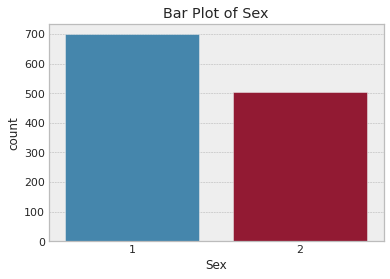

In [187]:
#The sex that dominated our dataset
sns.countplot(patient['sex'], order= patient['sex'].value_counts().iloc[:2].index)
plt.title('Bar Plot of Sex')
plt.xlabel('Sex', fontsize=12)
plt.xticks(rotation = 0)

Females were the most checked for Hypothyroidism

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

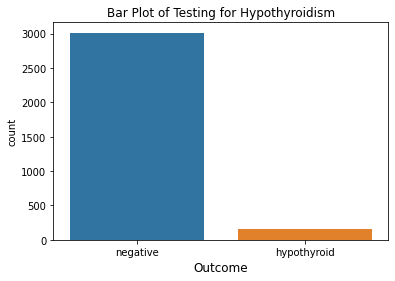

In [6]:
#Lets see the total number of various outcomes of our patient i.e. positive or negative of Hypothyroidism
sns.countplot(patient['status'], order= patient['status'].value_counts().index)
plt.title('Bar Plot of Testing for Hypothyroidism')
plt.xlabel('Outcome', fontsize=12)
plt.xticks(rotation = 0)

From the visualization above very few patients tested positive for Hypothyroidsm

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

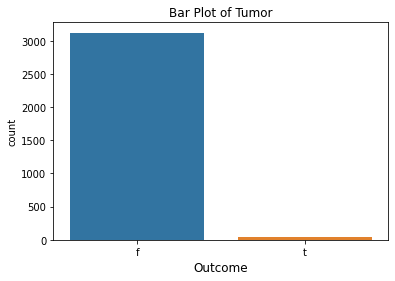

In [7]:
#No of patients that had tumor 
sns.countplot(patient['tumor'], order= patient['tumor'].value_counts().index)
plt.title('Bar Plot of Tumor')
plt.xlabel('Outcome', fontsize=12)
plt.xticks(rotation = 0)

A relatively high number of patients did not report to have tumor 

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

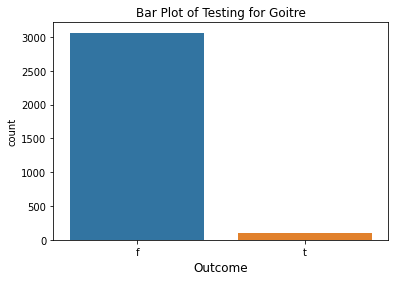

In [8]:
#Lets see the number of patients that tested postive for goiter 
sns.countplot(patient['goitre'], order= patient['goitre'].value_counts().index)
plt.title('Bar Plot of Testing for Goitre')
plt.xlabel('Outcome', fontsize=12)
plt.xticks(rotation = 0)

Few patients recorded postive of goiter 

### Bivariate analysis 

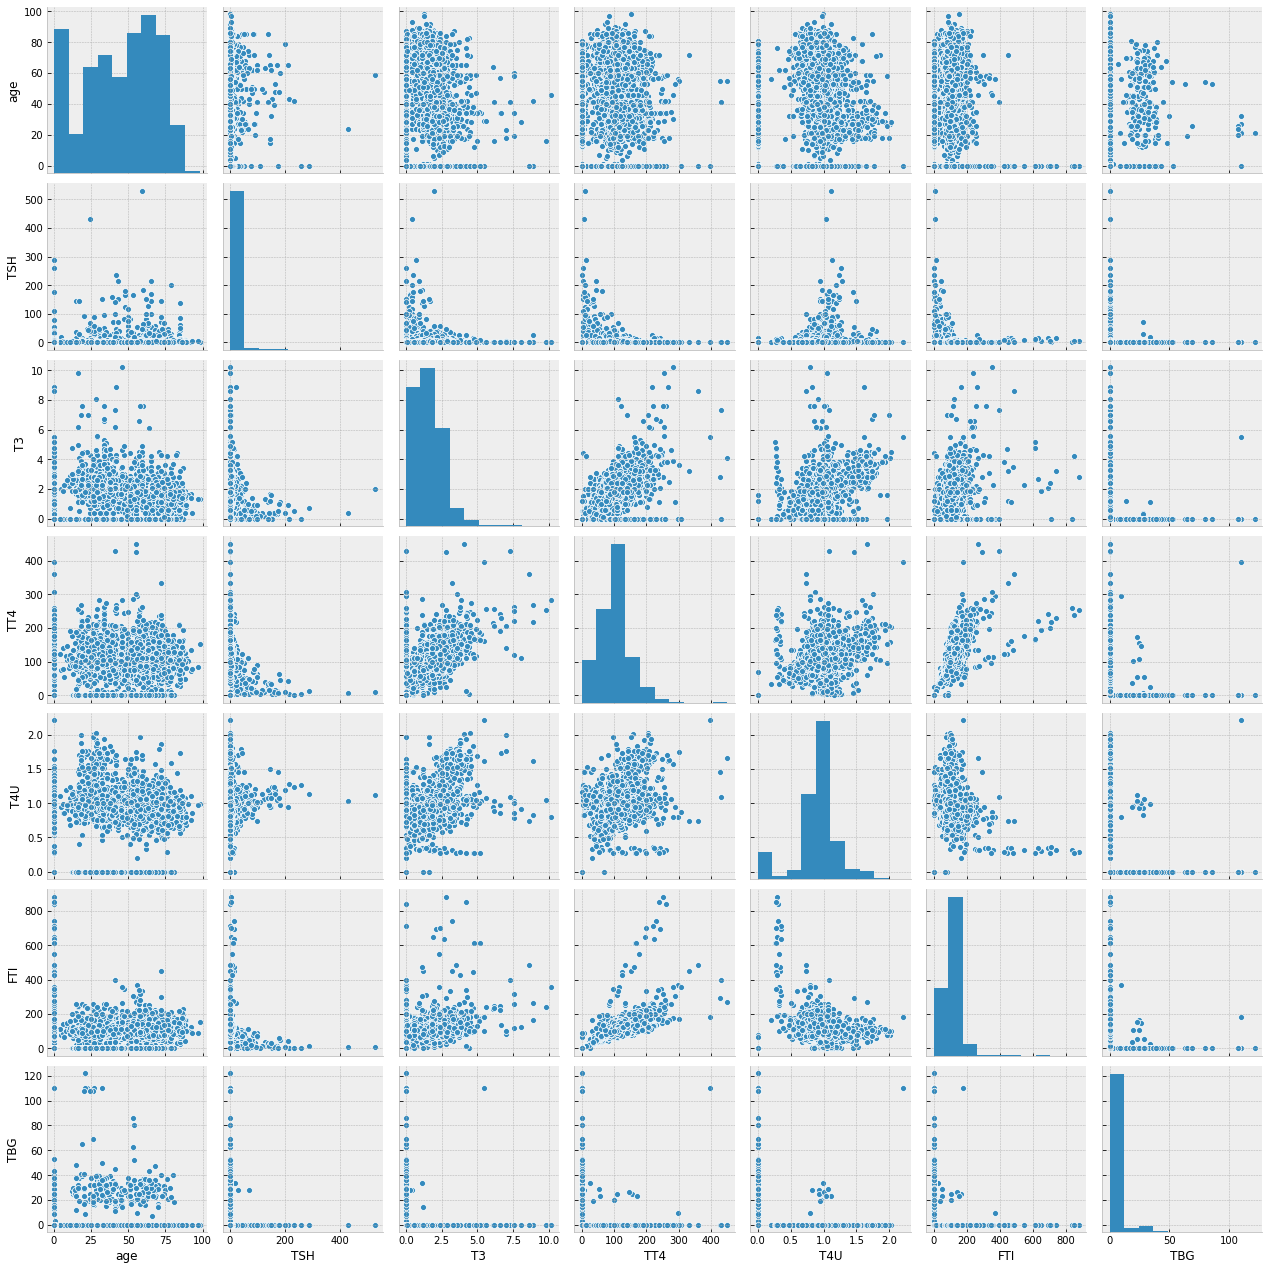

In [34]:
sns.pairplot(num)

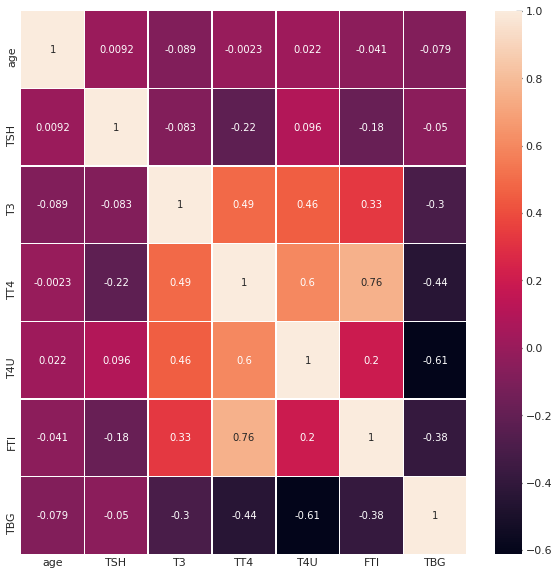

In [192]:
#A correlation matrix to our numerical columns
corrMatrix = num.corr()
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(corrMatrix, annot=True,  linewidths=.5, ax=ax)

We can conclude that the vaiable FTI and TT4 have a very strong correlation thus can be used as variable to check for prefernce of Hypothyroidism



## 6. Implementing the Solution

Decision Trees

> Random forest



In [48]:
#training the data we split to train and test 
from sklearn.model_selection import train_test_split
randomforest = patient.columns.to_list()
randomforest.remove('status')
X = patient[randomforest].values
y = patient['status'].values
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=20)
X

array([[ 20.,   1.,   0., ...,  68.,   0.,   0.],
       [ 29.,   1.,   0., ...,  89.,   0.,   0.],
       [ 45.,   1.,   0., ..., 112.,   0.,   0.],
       ...,
       [ 29.,   1.,   0., ...,  98.,   0.,   0.],
       [ 77.,   2.,   0., ..., 104.,   0.,   0.],
       [ 74.,   1.,   0., ..., 137.,   0.,   0.]])

In [49]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators= 100, max_depth= 5, max_features= 20, min_samples_split=3)
rforest.fit(X_train,y_train)

y_pred = rforest.predict(X_test)

comparison = pd.DataFrame({'Accurate':y_test, 'Predicted':y_pred})
comparison.describe()

,Accurate,Predicted
count,246,246
unique,1,1
top,0,0
freq,246,246


In [50]:
#checking for our model acuracy score 
rforest.score(X_train, y_train)

1.0

Gradient boot trees 

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
ada_boost = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = 300, random_state = 0)


In [52]:
ada_boost = ada_boost.fit(X_train, y_train)
y_predict_ada_boost = ada_boost.predict(X_test)
y_predict_ada_boost

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

Gradient boost 

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
no_of_trees = 100
clf_gb = GradientBoostingClassifier(learning_rate= 0.3, n_estimators=no_of_trees, min_samples_split=3,max_depth=10)
clf_gb.fit(X_train,y_train)
gb_pred = clf_gb.predict(X_test)




> SVM

> Linear SVM







In [0]:
#  Spliting the data into training and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
from sklearn.svm import SVC,LinearSVC
svm_model = SVC(kernel = 'linear', random_state=0)
svm_model.fit(x_train, y_train)


In [0]:
#test for accuracy 
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)


Polynomial 

In [0]:
#training and fiting model
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
polyclassifier = SVC(kernel = 'poly', degree = 3, gamma='auto')
polyclassifier.fit(x_train,y_train)

In [0]:
#checking for accuracy of our model 
y_pred = polyclassifier.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)



> Radial Basis Function



In [0]:
#fiting the training set 
radial = SVC(kernel = 'rbf')
radial.fit(x_train, y_train)

In [0]:
#Predicted values
y_pred = radial.predict(x_test)

Conclusion 

The accuracy can be outlined to be at 99%